# Identifiability

In [1]:
import json
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
results_file_name = "identifiability_results.json"

if os.path.exists(results_file_name):
    with open(results_file_name, 'r') as fp:
        results = json.load(fp)
else:
    from identifiability import get_results

    with open("pmDAGs.json", 'r') as fp:
        data = json.load(fp)

    results = get_results(data)

    with open(results_file_name, 'w') as fp:
        json.dump(results, fp)

In [3]:
df = pd.DataFrame(columns=['name', 'expr', 'iter', 'loss', 'average effective distance', 'KL div'])

for name, experiments in results.items():
    for expr, iterations in experiments.items():
        for i, (iter, errors) in enumerate(iterations.items()):
            df.loc[len(df), df.columns] = name, int(expr), int(iter), \
                                          float(errors['loss']), \
                                          float(errors['KL div']), \
                                          float(errors['average effective distance'])

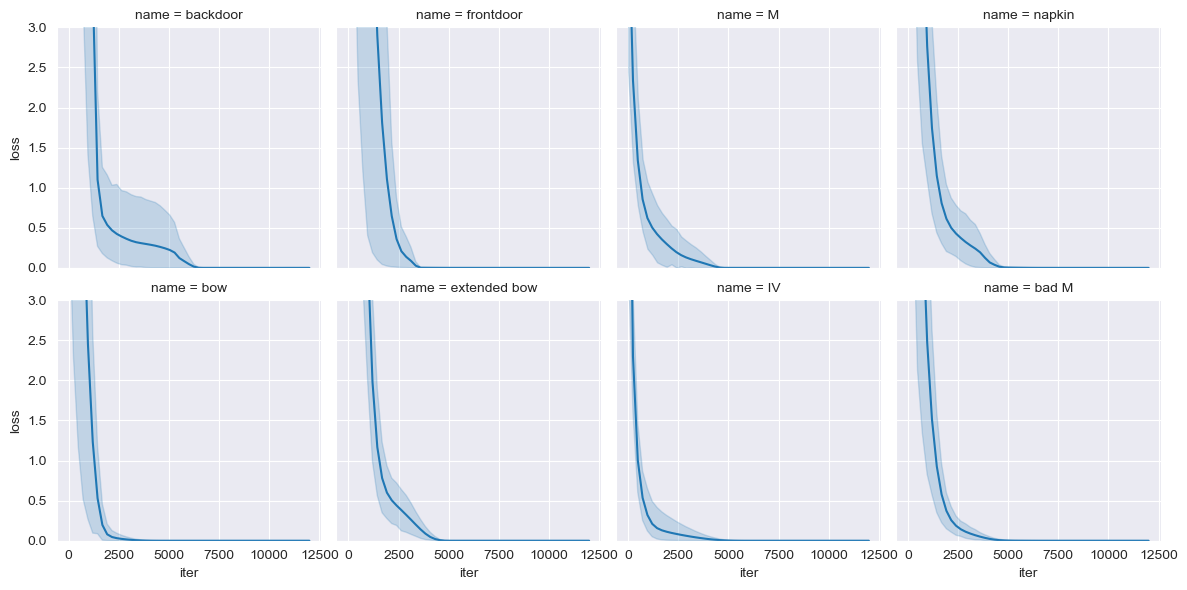

In [4]:
grid = sns.FacetGrid(df, col="name", palette="tab20c", col_wrap=4, height=3)
grid.map(sns.lineplot, "iter", "loss")
grid.set(ylim=(0, 3))
plt.show()

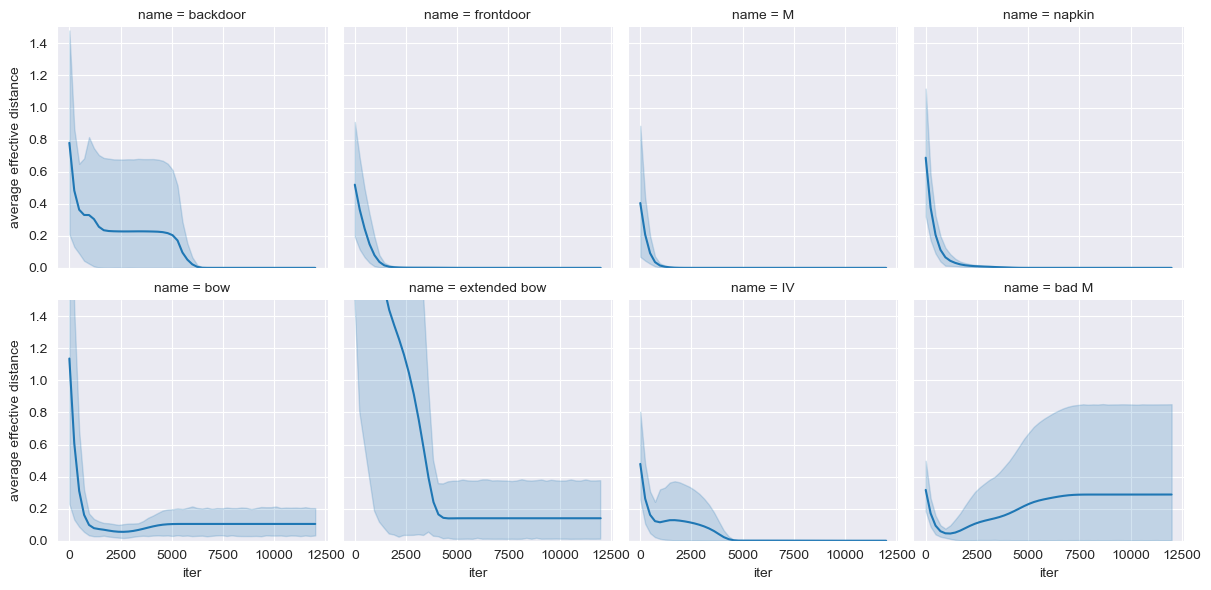

In [5]:
grid = sns.FacetGrid(df, col="name", palette="tab20c", col_wrap=4, height=3)
grid.map(sns.lineplot, "iter", "average effective distance")
grid.set(ylim=(0, 1.5))
plt.show()

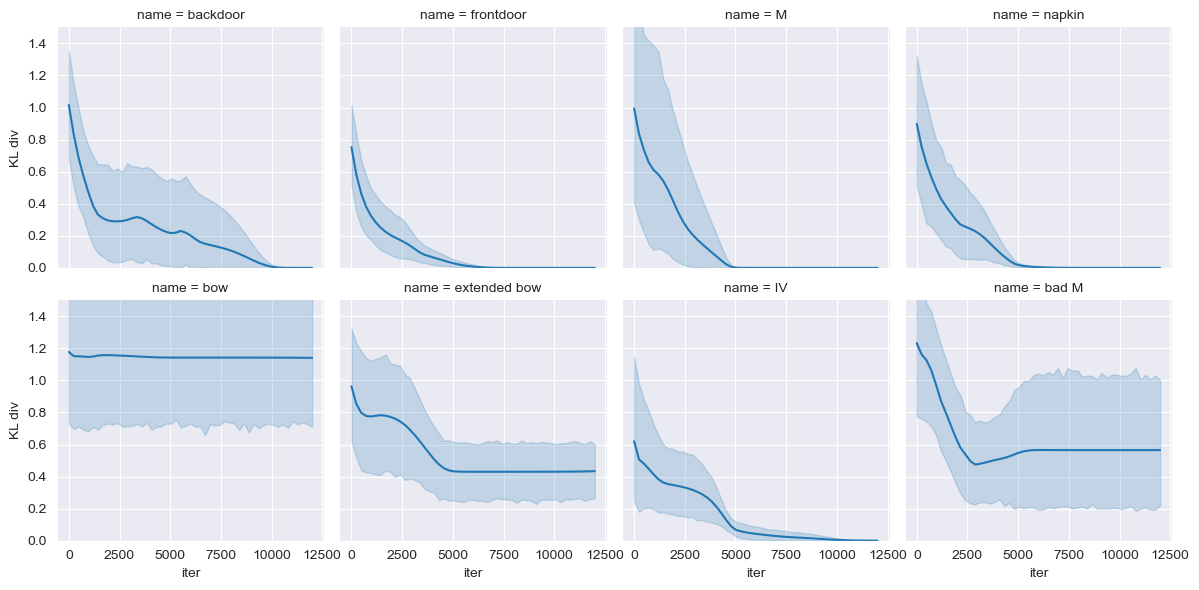

In [6]:
grid = sns.FacetGrid(df, col="name", palette="tab20c", col_wrap=4, height=3)
grid.map(sns.lineplot, "iter", "KL div")
grid.set(ylim=(0, 1.5))
plt.show()